In [1]:
import os
from os.path import abspath

from nipype import Workflow, Node, MapNode, Function
from nipype.interfaces.fsl import BET, IsotropicSmooth, ApplyMask

from nilearn.plotting import plot_anat
%matplotlib inline
import matplotlib.pyplot as plt



191110-12:00:23,412 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.2.3)


/home/javiteri95/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# will use a T1 image
input_file =  abspath("/media/javiteri95/Multimedia/Programacion/Integradora/gitFolder/Data/GE3T/100/pre/T1.nii.gz")

In [3]:
bet = BET()
bet.inputs.in_file = input_file
bet.inputs.out_file = "../Data/Output/G3T_100_pre_T1.nii.gz"
res = bet.run()


In [4]:
res.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = <undefined>
meshfile = <undefined>
out_file = /media/javiteri95/Multimedia/Programacion/Integradora/gitFolder/Data/Output/G3T_100_pre_T1.nii.gz
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>

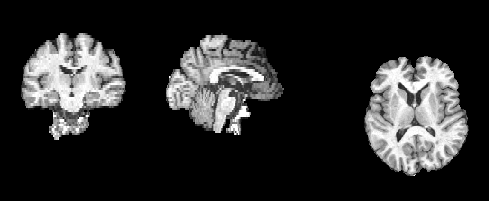

In [5]:
plot_anat('../Data/Output/G3T_100_pre_T1_bet.nii.gz', display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [6]:
BET.help()

Wraps the executable command ``bet``.

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

        [Mandatory]
        in_file: (a pathlike object or string representing an existing file)
                input file to skull strip
                argument: ``%s``, position: 0

        [Optional]
        out_file: (a pathlike object or string representing a file)
                name of output skull stripped image
                argument: ``%s``, position: 1
        outline: (a boolean)
                create surface outline image
                argument: ``-o``
        mask: (a boolean)
                c

In [8]:
smoothing = IsotropicSmooth()
smoothing.inputs.in_file = "/media/javiteri95/Multimedia/Programacion/Integradora/gitFolder/Data/GE3T/100/pre/T1.nii.gz"
smoothing.inputs.fwhm = 4
smoothing.inputs.out_file = "../Data/Output/G3T_100_pre_T1_smoothing.nii.gz"
smoothing.run()

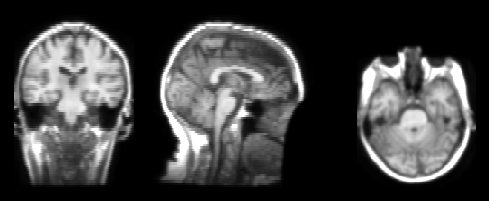

In [9]:
plot_anat('../Data/Output/G3T_100_pre_T1_smoothing.nii.gz', display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [10]:
# Create a small example function
def add_two(x_input):
    return x_input + 2

# Create Node
addtwo = Node(Function(input_names=["x_input"],
                       output_names=["val_output"],
                       function=add_two),
              name='add_node')

In [13]:
addtwo.inputs.x_input = 4
temp_res = addtwo.run()
temp_res.outputs

191110-15:15:34,336 nipype.workflow INFO:
	 [Node] Setting-up "add_node" in "/tmp/tmpkf9ci6au/add_node".
191110-15:15:34,346 nipype.workflow INFO:
	 [Node] Cached "add_node" - collecting precomputed outputs
191110-15:15:34,347 nipype.workflow INFO:
	 [Node] "add_node" found cached.



val_output = 6

In [14]:
addtwo.result.outputs


val_output = 6

In [15]:
addtwo.result.outputs.val_output

6